<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

In [7]:
!pip install lxml

Create a soup object


In [8]:
#your code goes here
soup = BeautifulSoup(data, "lxml")

Scrape the `Language name` and `annual average salary`.


In [9]:
#your code goes here
table = soup.find("table")

languages = []
for row in table.find_all("tr"):
    languages.append(row.find_all("td")[1].getText())

salary = []
for row in table.find_all("tr"):
    salary.append(row.find_all("td")[3].getText())

df = pd.DataFrame(columns=[languages,salary]).T.reset_index()
df = df.rename(columns={"level_0": "Language", "level_1": "Average Annual Salary"})[1:]

Save the scrapped data into a file named *popular-languages.csv*


In [10]:
# your code goes here
df.head()

,Language,Average Annual Salary
1,Python,"$114,383"
2,Java,"$101,013"
3,R,"$92,037"
4,Javascript,"$110,981"
5,Swift,"$130,801"


In [11]:
df.to_csv("popular-languages.csv")

## Authors


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df["Average Annual Salary"] = df["Average Annual Salary"].replace('[\$,]', '', regex=True).astype(float)

<AxesSubplot:xlabel='Average Annual Salary', ylabel='Language'>

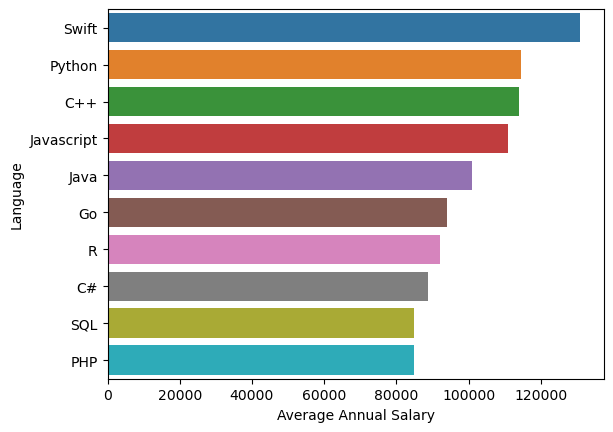

In [20]:
sns.barplot(data=df, y="Language", x="Average Annual Salary",
           order=df.sort_values("Average Annual Salary",ascending=False).Language)

Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
